# Part 1: Data Gathering
Data should be gathered from 3 different sources in this project and final outcome of this part, is 3 data frames which will be assessed and cleaned in Part 2 and Part 3 respectively

In [2]:
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
weratedogs=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
weratedogs['tweet_id'].values

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [5]:
# initially, I downloaded "image-prediction.tsv" from resources section
#and by using .read_csv I gather this data, but:
#I found it has been asked to download it using provided url and requests.


#image=pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [7]:
with open('image-predictions.tsv','wb') as file:
    file.write(response.content)

In [8]:
image=pd.read_csv('image-predictions.tsv', sep='\t')

In [9]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
#3rd sources of data: I want to have a df including: Tweeter ID, retweet count and favorite count.
# I have to use "Tweepy" API (output is in JSON format)

In [9]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
tweet_ids = weratedogs['tweet_id'].values


# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
18

Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
20

Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
23

In [10]:
df_list=[]
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file:
        data=json.loads(line)
        tweet_id=data['id']
        retweet_count=data['retweet_count']
        favorite_count=data['favorite_count']
        df_list.append({'tweet_id':tweet_id, 'retweet_count':retweet_count,'favorite_count':favorite_count})
       

df_tweet=pd.DataFrame(df_list,columns=['tweet_id', 'retweet_count','favorite_count'])
df_tweet.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


This is end of Gathering section. In total, I have three data frames (weratedogs, image and df_tweet) that I will work with them in Assessing and Cleaning and eventually in Analyzing section

In [1]:
#just a quick check of 3 data frames in the following cells and then:
# start Part 2: Assessment

In [43]:
weratedogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [44]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7591,35838
1,892177421306343426,5627,30932
2,891815181378084864,3720,23280
3,891689557279858688,7770,39109
4,891327558926688256,8364,37373


In [46]:
#Detect and document at least eight (8) quality issues and two (2) tidiness issues in your  Jupyter Notebook.

You do not need to gather the tweets beyond August 1st, 2017.

# Part 2: Data Assessment
As it has been asked in "Project Details" Section, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

The first thing that I will do here, is to get a copy of all 3 data frames and assing simpler name to them.

In [12]:
df1=weratedogs.copy()

In [13]:
df2=image.copy()

In [14]:
df3=df_tweet.copy()

**df1 investigation**

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2063,671159727754231808,NaN,NaN,2015-11-30 02:52:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anthony. He just finished up his maste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671159727...,5,10,Anthony,None,None,None,None
2137,670046952931721218,NaN,NaN,2015-11-27 01:10:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ben &amp; Carson. It's impossible for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670046952...,11,10,Ben,None,None,None,None
428,821149554670182400,NaN,NaN,2017-01-17 00:18:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luca. He got caught howling. H*ckin em...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821149554...,12,10,Luca,None,None,None,None
1696,681242418453299201,NaN,NaN,2015-12-27 22:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Champ. He's being sacrificed to the Az...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681242418...,10,10,Champ,None,None,None,None
1526,690374419777196032,NaN,NaN,2016-01-22 03:24:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phred. He's an Albanian Flepperkush. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690374419...,11,10,Phred,None,None,None,None


In [27]:
#statistical description of integer columns
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
#describe function specifically for "rating_numerator"
df1['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [16]:
#from previous row, it sounds like that something is odd about values below Q1 and above Q3
#moew investigation of this column using "value.counts()"
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
#doing the same for "rating_denominator"
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
sum(df1['tweet_id'].duplicated())

0

in this cell, I just wanted to check that if there is any tweet_id duplicated or not and since the sum is zero: there is no duplicated row.

In [108]:
#lots of "None" in ('doggo', 'floofer', 'pupper', 'puppo').
df1['doggo'].value_counts()
df1['doggo'].value_counts()
df1['doggo'].value_counts()
df1['doggo'].value_counts()

None     2204
doggo      95
Name: doggo, dtype: int64

In [109]:
df1['floofer'].value_counts()

None       2290
floofer       9
Name: floofer, dtype: int64

In [110]:
df1['pupper'].value_counts()

None      2045
pupper     254
Name: pupper, dtype: int64

In [111]:
df1['puppo'].value_counts()

None     2271
puppo      28
Name: puppo, dtype: int64

In [113]:
sum(df1['puppo']=='puppo')+sum(df1['pupper']=='pupper')+sum(df1['floofer']=='floofer')+sum(df1['doggo']=='doggo')

386

Summation of values in these 4 columns which has values other than *None* is only **386**, while the whole observations is 2356. I was suspecious that maybe some dog stage are recorded in **name** column and in the following cell I tried to investigate this hypothesis.

In [114]:
sum(df1['name']=='doggo')+sum(df1['name']=='floofer')+sum(df1['name']=='pupper')+sum(df1['name']=='puppo')

0

it sounds like that none of dog stages are recorded in **name** column. 

In [117]:
#I also tried to investigate "name" column in more details to make sure nothing is recorded in "name" column which could be related to dog stage.
df1['name'].value_counts().sort_values()

Odin            1
Butters         1
Henry           1
Stella          1
Blakely         1
Brandi          1
Jordy           1
Norman          1
Banjo           1
Timmy           1
Ben             1
Grady           1
Blu             1
Snoop           1
Arnold          1
Harry           1
Ronduh          1
Ester           1
Eevee           1
Skye            1
Mookie          1
Pluto           1
Saydee          1
Andy            1
Timofy          1
Antony          1
Christoper      1
Kramer          1
Ed              1
Cilantro        1
             ... 
very            5
Finn            5
Bella           5
Louis           5
Sammy           5
Sunny           5
Milo            6
Dave            6
Scout           6
Jack            6
Oscar           6
Leo             6
an              7
Daisy           7
Buddy           7
Toby            7
Bailey          7
the             8
Sadie           8
Bo              9
Lola            9
Winston         9
Oliver         10
Penny          10
Tucker    

**df2 investigation**

In [19]:
#format of string in p1,p2 and p3 columns: 
#all should start with  upper_case or lower_case and also "_" instead of "-"
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
696,684481074559381504,https://pbs.twimg.com/media/CX_D6AJWwAAnBIw.jpg,1,Chihuahua,0.937810,True,Pomeranian,0.020307,True,polecat,0.017357,False
1804,832215726631055365,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False
1948,862831371563274240,https://pbs.twimg.com/media/C_lkieeVwAAm0L4.jpg,2,Australian_terrier,0.207281,True,Irish_terrier,0.156296,True,German_shepherd,0.123536,True
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,2,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True
887,699072405256409088,https://pbs.twimg.com/ext_tw_video_thumb/69907...,1,Shih-Tzu,0.599587,True,Pekinese,0.213069,True,Maltese_dog,0.154293,True


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
#based on the information provided in "Project Details", it sounds like that this column included categorical values.
#I just wanted to assure that not more than 4 values exists for this column
df2['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

**df3 investigation**

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [26]:
df3.sample(5)

,tweet_id,retweet_count,favorite_count
1617,684122891630342144,461,1979
726,780192070812196864,2246,8750
1394,698355670425473025,439,1818
2282,666826780179869698,86,239
591,797545162159308800,4915,14705


**all dataframe investigation to find duplicated columns**

In [10]:
all_columns=pd.Series(list(df1)+list(df2)+list(df3))

In [13]:
all_columns

0                       tweet_id
1          in_reply_to_status_id
2            in_reply_to_user_id
3                      timestamp
4                         source
5                           text
6            retweeted_status_id
7       retweeted_status_user_id
8     retweeted_status_timestamp
9                  expanded_urls
10              rating_numerator
11            rating_denominator
12                          name
13                         doggo
14                       floofer
15                        pupper
16                         puppo
17                      tweet_id
18                       jpg_url
19                       img_num
20                            p1
21                       p1_conf
22                        p1_dog
23                            p2
24                       p2_conf
25                        p2_dog
26                            p3
27                       p3_conf
28                        p3_dog
29                      tweet_id
30        

In [12]:
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## Summary of Assessment

#### Quality:
- `df1`: **in_reply_to_status_id**, **in_reply_to_user_id**,**retweeted_status_timestamp**, **retweeted_status_id** and **retweeted_status_user_id** have lots of missing values. 
- `df1`: **rating_numerator**: data between Q1 and Q3 are in reasonable ranges but from min to Q1 and from Q3 to max it sounds like that there are lots of outliers.
- `df1`: **rating_denominator**: It has been mentioned that denominator is usually 10, but there are some values which are not 10. specifically there is one observation with denominator of 0. It sounds like that zero should be 10
- `df1`: **timstamp column**: after separating data and time, data after Aug1 2017 are not useful anymore as it has been mentioned in "Project Details" section.
- `df1`: lots of *None* values in **'doggo', 'floofer', 'pupper', 'puppo'** columns.

- `df1`: **timestamp column**: data type is object (it should be date).
- `df1`,`df2` and `df3`: **tweet_ID** data type (not a big deal but as we don't do numerical calculation on tweet_ID, we should consider data type as an object instead of integer).
- `df2`: **image_number**: data type is wrong (categorical instead of integer)
- `df2`: **p1**, **p2** and **p3** values are not following consistent format
- `df2`: **p1**, **p2** and **p3** column names are not so descriptive




#### Tidiness:
- `df1`: doggo, floofer, pupper and puppo are 4 types of dogs (values) and they are not separate columns.
- `df1`: timestamp we have date and time in this column.
- `df3` and `df1`: we don't need to have separate table for **retweet_count** and **favorite_count** in `df3` and these two columns could be merged with `df1`

# Phase 3: Cleaning

## Resolving missing value issues

### Defining

As there are lots of missing values for these columns, I have two options: 1. leave them as it it or 2. Drop the whole columns. I will not use them any more in future analysis. . Alternative approach was to drop the observations(rows) with null values, but in that case I miss so many observations which have information for other columns other than these 5 columns, so that was not appropriate approach. 

So, the action plan is **Drop these columns**

### Coding

In [15]:
df1.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1,inplace=True)

### Testing

In [16]:
df1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

As can be seen here, 5 column with lots of missing values are not in df1 any more.

## Resolving Tidiness Issues

### Defining

by checking the format of data in **timestamp** column, we can confirm that separating values based on ther position (string indexing), works for us in this case. 

So, **use string indexing and separate time from date and put them in two different columns** is the strategy that I am going to follow to clead (tidiness issue) of **timestamp** column

### Coding

In [17]:
#creating new column with the name 'date' for date portion of timestamp values
df1['date']=df1['timestamp'].str[0:10]

In [18]:
#creating new column with the name 'time' for time portion of timestamp values
df1['time']=df1['timestamp'].str[11:19]

In [19]:
#as date values are in 'object' format, I changed the format of this column to datetime
df1['date']=pd.to_datetime(df1['date'])

In [20]:
#As mentioned in "Project Details" I don't need to keep observation beyond Aug 1st, 2017
#first I just want to have some sense about date values:
df1['date'].sort_values()

2355   2015-11-15
2354   2015-11-15
2353   2015-11-15
2328   2015-11-16
2329   2015-11-16
2330   2015-11-16
2331   2015-11-16
2332   2015-11-16
2333   2015-11-16
2334   2015-11-16
2335   2015-11-16
2336   2015-11-16
2337   2015-11-16
2338   2015-11-16
2339   2015-11-16
2352   2015-11-16
2341   2015-11-16
2340   2015-11-16
2351   2015-11-16
2349   2015-11-16
2348   2015-11-16
2347   2015-11-16
2350   2015-11-16
2345   2015-11-16
2344   2015-11-16
2343   2015-11-16
2342   2015-11-16
2346   2015-11-16
2318   2015-11-17
2313   2015-11-17
          ...    
29     2017-07-15
28     2017-07-16
27     2017-07-16
26     2017-07-17
25     2017-07-18
24     2017-07-18
23     2017-07-19
22     2017-07-19
21     2017-07-19
20     2017-07-20
19     2017-07-21
17     2017-07-22
18     2017-07-22
16     2017-07-23
15     2017-07-24
14     2017-07-24
13     2017-07-25
12     2017-07-25
11     2017-07-25
10     2017-07-26
9      2017-07-26
8      2017-07-27
6      2017-07-28
7      2017-07-28
5      201

In [21]:
#now, filter df1 and just keep the observations before Aug 1st, 2017
df1=df1[df1['date']<='2017-07-01']

In [22]:
#drop 'timestamp' as I don't need it anymore
df1=df1.drop('timestamp', axis=1)

### Testing

In [23]:
#check the columns and format of values in them
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2299 entries, 57 to 2355
Data columns (total 13 columns):
tweet_id              2299 non-null int64
source                2299 non-null object
text                  2299 non-null object
expanded_urls         2242 non-null object
rating_numerator      2299 non-null int64
rating_denominator    2299 non-null int64
name                  2299 non-null object
doggo                 2299 non-null object
floofer               2299 non-null object
pupper                2299 non-null object
puppo                 2299 non-null object
date                  2299 non-null datetime64[ns]
time                  2299 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 251.5+ KB


In [24]:
#check the date and make sure I don't have any values beyond Aug 1st 2017
df1['date'].max()

Timestamp('2017-07-01 00:00:00')

### Defining

Here, I should use **Melt** function, to combine all dog stages in one single column. 
After that, I will filter the df and get rid of the *None* values by knowing this fact that this action will reduce the number of observations in my data frame significantly.


### Coding

In [25]:
df1 = pd.melt(df1, id_vars=['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name','date', 'time'],
                           var_name='temp_column', value_name='stage')

In [26]:
# drop the 'None' values in "stage" column which is created in previous step.
df1 = df1[df1.stage != "None"]

In [27]:
#drop the 'temp_column' which is not useful for us
df1=df1.drop('temp_column', axis=1)

### Testing

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 42 to 7923
Data columns (total 10 columns):
tweet_id              386 non-null int64
source                386 non-null object
text                  386 non-null object
expanded_urls         380 non-null object
rating_numerator      386 non-null int64
rating_denominator    386 non-null int64
name                  386 non-null object
date                  386 non-null datetime64[ns]
time                  386 non-null object
stage                 386 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 33.2+ KB


I need to emphasize here that **expanded_urls** non-null values are not the same as other columns. Although one option was to delete the null rows, but as I may not need this column in future analysis, I leave this column as it is.

### Defining

**df3** should be part of **df1**. `merge` function will be used for coding purpose

### Coding

In [29]:
df1 = pd.merge(df1, df3, on=['tweet_id'], how='left')

### Testing

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 385
Data columns (total 12 columns):
tweet_id              386 non-null int64
source                386 non-null object
text                  386 non-null object
expanded_urls         380 non-null object
rating_numerator      386 non-null int64
rating_denominator    386 non-null int64
name                  386 non-null object
date                  386 non-null datetime64[ns]
time                  386 non-null object
stage                 386 non-null object
retweet_count         381 non-null float64
favorite_count        381 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 39.2+ KB


For some reasons, after merging df3 with df1, format of columns in df3 (*retweet_count* and *favorite_count*) has been changed from integer to float and I will change these two columns to int64 again.

In [31]:
#first I need to drop null values for retweet_count and favorite_count. 

df1=df1.dropna(subset=['retweet_count', 'favorite_count'])

In [32]:
#change format of retweet_count to int64
df1.retweet_count=df1.retweet_count.astype('int64')

In [33]:
#change format of favorite_count to int64
df1.favorite_count=df1.favorite_count.astype('int64')

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 385
Data columns (total 12 columns):
tweet_id              381 non-null int64
source                381 non-null object
text                  381 non-null object
expanded_urls         375 non-null object
rating_numerator      381 non-null int64
rating_denominator    381 non-null int64
name                  381 non-null object
date                  381 non-null datetime64[ns]
time                  381 non-null object
stage                 381 non-null object
retweet_count         381 non-null int64
favorite_count        381 non-null int64
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 38.7+ KB


## Quality

### Defining

replacing zero value in **rating_denominator** with 10

### Coding

In [35]:
df1['rating_denominator'] = df1['rating_denominator'].replace(0, 10)

### Testing

In [36]:
df1['rating_denominator'].value_counts()

10    381
Name: rating_denominator, dtype: int64

### Defining

for **rating_numerator** and for the values which sounds like they are outlier(i.e.values much lower than Q1 and values much higher than Q3), I can drop these rows. but I have decided to replace them with values above Q3 with 3 and values below Q1 with Q1.

### Coding

In [37]:
num_q1=df1['rating_numerator'].quantile(0.25)
num_q3=df1['rating_numerator'].quantile(0.75)


In [38]:
#I already found that Q3 is 12 and 13,14 and 27 are the only values above 12
df1['rating_numerator'] = df1['rating_numerator'].replace([13,14,27], num_q3)

In [39]:
#I already found that Q1 is 10 and 3,6,5,7,8,9 are the only values below 10

df1['rating_numerator'] = df1['rating_numerator'].replace([3,6,5,7,8,9], num_q1)

### Testing

In [40]:
df1['rating_numerator'].describe()

count    381.000000
mean      11.160105
std        0.866380
min       10.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       12.000000
Name: rating_numerator, dtype: float64

### Defining

change data type of **tweet_id** in df1 and df2 using `astype`

### Coding

In [41]:
df1['tweet_id']=df1['tweet_id'].astype(str)

In [42]:
df2['tweet_id']=df2['tweet_id'].astype(str)

### Testing

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 385
Data columns (total 12 columns):
tweet_id              381 non-null object
source                381 non-null object
text                  381 non-null object
expanded_urls         375 non-null object
rating_numerator      381 non-null int64
rating_denominator    381 non-null int64
name                  381 non-null object
date                  381 non-null datetime64[ns]
time                  381 non-null object
stage                 381 non-null object
retweet_count         381 non-null int64
favorite_count        381 non-null int64
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 38.7+ KB


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Defining

Change data type of **img_num** in df2 from integer to categorial

### Coding

In [45]:
df2['img_num']=df2['img_num'].astype('category')

### Testing

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(1), float64(3), object(5)
memory usage: 138.1+ KB


### Defining

**p1**, **p2**, **p3** names should be changed to be more descriptive

### Coding

In [47]:
df2=df2.rename(columns={"p1": "first_most_likely", "p2": "second_most_likely", "p3": "third_most_likely" })

### Testing

In [48]:
df2.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_most_likely', 'p1_conf',
       'p1_dog', 'second_most_likely', 'p2_conf', 'p2_dog',
       'third_most_likely', 'p3_conf', 'p3_dog'],
      dtype='object')

In [49]:
df2.head(10)

,tweet_id,jpg_url,img_num,first_most_likely,p1_conf,p1_dog,second_most_likely,p2_conf,p2_dog,third_most_likely,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Defining

replace **"-"** with **"_"** 
 and lowercase all texts in first, second and third most likely columns

### Coding

In [50]:
df2['first_most_likely'] = df2['first_most_likely'].str.lower()

In [51]:
df2['second_most_likely'] = df2['second_most_likely'].str.lower()

In [52]:
df2['third_most_likely'] = df2['third_most_likely'].str.lower()

In [53]:
df2['first_most_likely'] = df2['first_most_likely'].replace('-','_')

In [54]:
df2['second_most_likely'] = df2['second_most_likely'].replace('-','_')

In [55]:
df2['third_most_likely'] = df2['third_most_likely'].replace('-','_')

### Testing

In [56]:
df2.sample(5)

,tweet_id,jpg_url,img_num,first_most_likely,p1_conf,p1_dog,second_most_likely,p2_conf,p2_dog,third_most_likely,p3_conf,p3_dog
1614,802239329049477120,https://pbs.twimg.com/media/CyIgaTEVEAA-9zS.jpg,2,eskimo_dog,0.482498,True,siberian_husky,0.335774,True,malamute,0.134589,True
1136,728760639972315136,https://pbs.twimg.com/media/Ch0T71OWMAA4yIw.jpg,1,pembroke,0.939134,True,cardigan,0.054336,True,chihuahua,0.005590,True
1888,848212111729840128,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1,bedlington_terrier,0.333486,True,ibizan_hound,0.245797,True,wallaby,0.131647,False
544,677301033169788928,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,1,japanese_spaniel,0.661178,True,pekinese,0.150119,True,chihuahua,0.119720,True
1314,754856583969079297,https://pbs.twimg.com/media/CnnKCKNWgAAcOB8.jpg,2,golden_retriever,0.872385,True,labrador_retriever,0.099963,True,cocker_spaniel,0.006051,True


In [62]:
combined_data = pd.merge(df1, df2, on=['tweet_id'], how='left')

In [63]:
combined_data.to_csv('twitter_archive_master.cvs')

# Analysis of df1 and df2

I was curious to have a quick comparison between rating_numerator before and after cleaning. the following two plots shows significant difference between the results before cleaning and after cleaning.

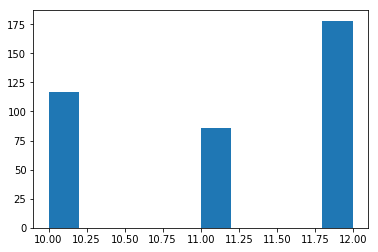

In [57]:
df1['rating_numerator'].hist(grid=False)

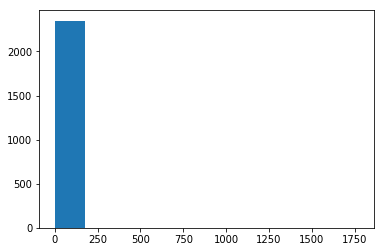

In [58]:
weratedogs['rating_numerator'].hist(grid=False, bins=10)

Then I was curious to see in df2 and for first_most_likely what are top 10 breeds ?

In [59]:
df2.first_most_likely.value_counts().sort_values(ascending=False).head(10)

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
chow                   44
samoyed                43
toy_poodle             39
pomeranian             38
cocker_spaniel         30
Name: first_most_likely, dtype: int64

and I was curious to do the same for second and third most probable top 10 breeds

In [60]:
df2.second_most_likely.value_counts().sort_values(ascending=False).head(10)

labrador_retriever          104
golden_retriever             92
cardigan                     74
chihuahua                    44
pomeranian                   42
french_bulldog               41
chesapeake_bay_retriever     41
toy_poodle                   37
cocker_spaniel               34
miniature_poodle             33
Name: second_most_likely, dtype: int64

In [61]:
df2.third_most_likely.value_counts().sort_values(ascending=False).head(10)

labrador_retriever           79
chihuahua                    58
golden_retriever             48
eskimo_dog                   38
kelpie                       35
kuvasz                       34
chow                         32
staffordshire_bullterrier    32
beagle                       31
cocker_spaniel               31
Name: third_most_likely, dtype: int64

it sounds like that **labrador_retriever** has the highest chance of being detected among all other breeds
